In [29]:
import pandas as pd # working with tabular data
import pickle # for machine learning models
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

from sklearn.feature_extraction import DictVectorizer # Machine Learning
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn.linear_model import Lasso # Regularization
from sklearn.linear_model import Ridge # Regularization

from sklearn.metrics import mean_squared_error # Loss Function
import math

In [2]:
yellow_jan_22 = pd.read_parquet('yellow_tripdata_2022-01.parquet')
yellow_jan_22

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [3]:
yellow_jan_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
yellow_jan_22['duration'] = yellow_jan_22.tpep_dropoff_datetime - yellow_jan_22.tpep_pickup_datetime
yellow_jan_22.duration = yellow_jan_22.duration.apply(lambda td: td.total_seconds()/60)

In [5]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

yellow_jan_22[categorical] = yellow_jan_22[categorical].astype(str)

In [6]:
yellow_jan_22

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000


In [13]:
all_durations_values = yellow_jan_22['duration']
mean_duration_values = sum(all_durations_values/len(yellow_jan_22['duration']))
mean_duration_values

14.212202918828746

In [21]:
sub_between_values = all_durations_values - mean_duration_values
squared_between_values = sub_between_values.apply(lambda x: x*x)

In [24]:
sum(squared_between_values)/len(squared_between_values)

2157.1654938422967

In [30]:
math.sqrt(sum(squared_between_values)/len(squared_between_values))

46.44529571272312

In [33]:
yellow_jan_22 = yellow_jan_22[(yellow_jan_22.duration >= 1) & (yellow_jan_22.duration <= 60)]
yellow_jan_22 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN,5.966667
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN,10.650000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN,11.000000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN,12.050000


In [41]:
# turn the categorical columns into a list of dictionaries
list_of_dicts = yellow_jan_22[categorical].to_dict(orient='records')
list_of_dicts

[{'PULocationID': '142', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '42'},
 {'PULocationID': '166', 'DOLocationID': '166'},
 {'PULocationID': '114', 'DOLocationID': '68'},
 {'PULocationID': '68', 'DOLocationID': '163'},
 {'PULocationID': '138', 'DOLocationID': '161'},
 {'PULocationID': '233', 'DOLocationID': '87'},
 {'PULocationID': '238', 'DOLocationID': '152'},
 {'PULocationID': '166', 'DOLocationID': '236'},
 {'PULocationID': '236', 'DOLocationID': '141'},
 {'PULocationID': '141', 'DOLocationID': '229'},
 {'PULocationID': '114', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '113'},
 {'PULocationID': '246', 'DOLocationID': '79'},
 {'PULocationID': '43', 'DOLocationID': '140'},
 {'PULocationID': '239', 'DOLocationID': '151'},
 {'PULocationID': '148', 'DOLocationID': '141'},
 {'PULocationID': '237', 'DOLocationID': '107'},
 {'PULocationID': '7', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '263'},
 {'PULocationID': '263', 'DOLoc

In [36]:
# Instantiate a dictionary vectorizer
dv = DictVectorizer()

In [37]:
# Fit the vectorizer and transform the data into a feature matrix
fm = dv.fit_transform(list_of_dicts)

# Convert the feature matrix to an array
fm_array = fm.toarray()

# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)

Dimensionality: (2421440, 515)


In [38]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [39]:
# Convert categorical columns to a dictionary
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# Set up trainign set
X_train = dv.fit_transform(train_dicts)

In [40]:
# define target variable and assign to y_train
target = 'duration'
y_train = yellow_jan_22[target].values

In [42]:
# instantiate linear regression model with default parameters
lr = LinearRegression()

# fit model to training data
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
# get predictions
y_pred = lr.predict(X_train)

In [44]:
# calculate RMSE
mean_squared_error(y_train, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

6.986190136062703

In [45]:
# read in the validation set
yellow_feb_22 = pd.read_parquet('yellow_tripdata_2022-02.parquet')

# create a new column 'duration' in minutes
yellow_feb_22['duration'] = yellow_feb_22.tpep_dropoff_datetime - yellow_feb_22.tpep_pickup_datetime
# convert duration to seconds
yellow_feb_22.duration = yellow_feb_22.duration.apply(lambda td: td.total_seconds()/60)

# define categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# convert categorical columns to strings
yellow_feb_22[categorical] = yellow_feb_22[categorical].astype(str)

# remove outliers by clipping duration between 1 and 60 mins
yellow_feb_22 = yellow_feb_22[(yellow_feb_22.duration >= 1) & (yellow_feb_22.duration <= 60)]

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

# reinstate our training set
train_dicts = yellow_jan_22[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# turn the categorical columns into a list of dictionaries
val_dicts = yellow_feb_22[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# define target variable and assign to y_val
target = 'duration'
y_train = yellow_jan_22[target].values
y_val = yellow_feb_22[target].values

# instantiate & fit our model to the TRAINING set
lr = LinearRegression()
lr.fit(X_train,y_train)

# Get predictions for the VALIDATION set
y_pred = lr.predict(X_val)

# calculate RMSE
mean_squared_error(y_val, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

7.786389560046105

/var/folders/kg/vbg8p1rj66n6w8xslj0r57xc0000gn/T/ipykernel_45501/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/kg/vbg8p1rj66n6w8xslj0r57xc0000gn/T/ipykernel_45501/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

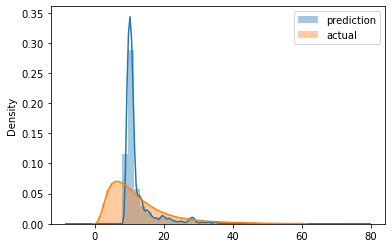

In [46]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [47]:
lr = Lasso() # default parameters
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.786389560046105

In [48]:
lr = Lasso(alpha=0.01) # try using different values for alpha - this controls the speed of gradient descent
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.786389560046105

In [49]:
lr = Ridge(alpha=0.01) # try using different values for alpha - this controls the speed of gradient descent
lr.fit(X_train, y_train)

y_pred - lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.786389560046105

In [50]:
df_train = read_dataframe('yellow_tripdata_2022-01.parquet')
df_val = read_dataframe('yellow_tripdata_2022-02.parquet')

df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.415120009983592

In [51]:
with open('./models/lin_reg.bin', 'wb') as f_out: # wb means write binary mlops-zoomcamp/week_1/models
    try:
        # Pickle both the dictionary vectorizer and the linear regression model
        pickle.dump((dv, lr), f_out)
        print("Model successfully pickled.")
    except Exception as e:
        print("Error occurred while pickling the model:", str(e))

Model successfully pickled.
